## Ableiten mit den finiten Differenzen

In [1]:
# Wie immer, lass uns zuerst die üblichen Module importieren
import numpy as np
import matplotlib.pyplot as plt

Definieren Sie den Spaltenvektor der diskreten Raumkoordinaten $$\mathbf{x} = \begin{pmatrix}
        x_1 \\
        x_2 \\
        ... \\
        x_{i-1} \\
        x_{i} \\
        x_{i+1} \\
        ... \\
        x_{n}
        \end{pmatrix} \, ,$$
    wählen Sie hierfür $L=1$ als Größe des Rechengebiets. 

In [2]:
L = 1 # Dimension des Rechengebietes 
n = 20 # Anzahl von Punkten
x = np.linspace(0,L,n) # Vektor x der Koordinaten
dx = L/(n-1) # Gitterweite

Um Ihre finite Differenzen zu testen, betrachten Sie die unendlich differenzierbare Funktion
    \begin{equation}
        f(x) = \sin (\pi x) e^{-x/2}
    \end{equation}
    und evaluieren Sie diese an den diskreten Punkten $x_i$. Speichern Sie das Ergebnis in dem Spaltenvektor $\mathbf{f}$. Hinweis: verwenden Sie hierfür die Funktionen `np.sin` und `np.exp` aus dem Modul Numpy und wenden Sie diese am Koordinatenarray $\mathbf{x}$ an, um $\mathbf{f}$ zu erhalten.

In [3]:
f = np.sin(np.pi*x)*np.exp(-x/2.)  # Define function 

Wir können die Funktion darstellen

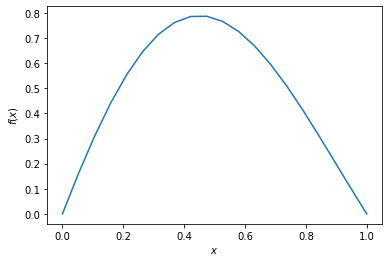

In [4]:
plt.figure()
plt.plot(x,f)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

Definieren Sie im Notebook die Matrix $\mathsf{D_1}$ der Koeffizienten von den finiten Differenzen so wie wir diese in Aufgabe 4.1 d) definiert haben. Hinweise: Um die Matrix $\mathsf{D_1}$ zu füllen können zwei Strategien folgen. Sie können eine Null-Matrix der geeigneten Größe mit `np.zeros` definieren und diese dann durch For-Schleifen wie gewünscht mit Zahlen füllen. Alternativ können Sie die Bandmatrix $\mathsf{D_1}$ dank ihrer Struktur durch eine Summe von mehreren `np.diag` Befehle direkt füllen. 

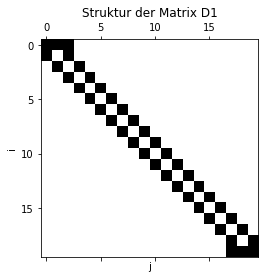

In [5]:
# Koeffizienten der finiten Differenzen
coeff_links = np.asarray([-3, 4, -1])    # Koeffizienten linker Rand
coeff_rechts = np.asarray([1, -4, 3])    # Koeffizienten rechter Rand
coeff = np.asarray([-1, 0, 1])           # Koeffizienten Mitte

# Definiere Matrix D1 mit for-Schleife

D1 = np.zeros((n,n))                     # Matrix of size (n,n)
# Mitte der Matrix
for i in range(1,n-1):
        D1[i,i-1:i+2] = coeff/(2*dx)
# Erste Zeile (linker Rand)
D1[0,0:3] = coeff_links/(2*dx)
# Letzte Zeile (rechter Rand)
D1[-1,-3:] = coeff_rechts/(2*dx)
# Plot Struktur der Matrix
plt.figure()
plt.title('Struktur der Matrix D1')
plt.spy(D1)
plt.ylabel('i')
plt.xlabel('j')
plt.show()

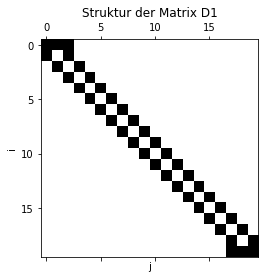

In [6]:
# Definiere Matrix D1 mit np.diag-Befehl

# Erste obere und untere Diagonale mit den Koeffizienten für die Mitte definieren
D1 = np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)
# Erste und letzte Zeile mit den Koeffizienten für den Rand anpassen
D1[0,0:3] = coeff_links
D1[-1,-3:] = coeff_rechts 
# Alles nach 2*dx teilen
D1 /= 2*dx


# Plot Struktur der Matrix
plt.figure()
plt.title('Struktur der Matrix D1')
plt.spy(D1)
plt.ylabel('i')
plt.xlabel('j')
plt.show()

Berechnen Sie die diskrete erste Ableitung $(\mathbf{f}_{/x})_\Delta \simeq  \mathsf{D_1}  \mathbf{f}$. Vergleichen Sie die diskrete Ableitung mit dem exakten analytischen Ausdruck in einem Diagramm. Hinweis: Um den Produkt $\mathsf{D_1}  \mathbf{f}$ zu berechnen, können Sie den Operator `@` verwenden (z.B. $\mathsf{D_1}$@$\mathbf{f}$). 

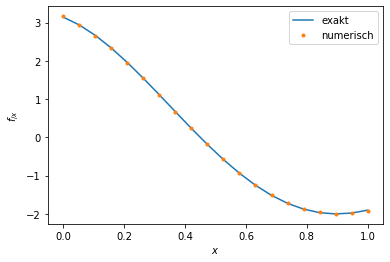

In [7]:
# numerische Ableitung berechnen
f_x = D1@f

# analytische Ableitung berechnen (Produktregel)
f_x_exakt = np.pi*np.cos(np.pi*x)*np.exp(-x/2.) - np.sin(np.pi*x)*np.exp(-x/2.)/2

# Ableitung darstellen
plt.figure()
plt.plot(x,f_x_exakt,label='exakt')
plt.plot(x,f_x, '.',label='numerisch')
plt.xlabel(r'$x$')
plt.ylabel(r'$f_{/x}$')
plt.legend()
plt.show()

Berechnen Sie die diskrete Ableitung $(\mathbf{f}_{/x})_\Delta$ für  unterschiedliche Gitterweiten $\Delta x$ (also für unterschiedliche $n$) und speichern Sie das Ergebnis. Berechnen Sie den maximalen Fehler zwischen der diskreten und exakten Ableitung 
    \begin{equation}
        E_{\mathrm{max}} = \max_{i=1}^n \left( \left| (f_{/x})_\Delta - f_{/x} \right| \right)
    \end{equation}
    und den mittleren quadratischen Fehler 
    \begin{equation}
        E_{\mathrm{rms}} = \sqrt{ \frac{\sum_{i=1}^n \left( (f_{/x})_\Delta - f_{/x} \right)^2 }{n}  } \, .
    \end{equation}

In [8]:
# Definiere einen Vektor mit unterschiedlichen Anzahl von Punkten
n_array = np.asarray([20,40,80,160,320,640,1280,2560])
E_max = np.zeros(n_array.shape)
E_rms = np.zeros(n_array.shape)

for i,n in enumerate(n_array):
   
    # Gitter
    # --------------------------------------
    x = np.linspace(0,L,n) # Vektor x der Koordinaten
    dx = L/(n-1) # Gitterweite
    
    # Definiere Matrix D1 mit np.diag-Befehl
    # --------------------------------------
    # Erste obere und untere Diagonale mit den Koeffizienten für die Mitte definieren
    D1 = np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)
    # Erste und letzte Zeile mit den Koeffizienten für den Rand anpassen
    D1[0,0:3] = coeff_links
    D1[-1,-3:] = coeff_rechts 
    # Alles nach 2*dx teilen
    D1 /= 2*dx
    
    # Ableitung Berechnen 
    # --------------------------------------
    # zu Ableitende Funktion definieren 
    f = np.sin(np.pi*x)*np.exp(-x/2.)  # Define function 
    
    # Finite Differenzen berechnen 
    f_x = D1@f
    
    # exakte Ableirung definieren 
    f_x_exakt = np.pi*np.cos(np.pi*x)*np.exp(-x/2.) - np.sin(np.pi*x)*np.exp(-x/2.)/2

    # Fehler berechnen
    # --------------------------------------
    E = f_x - f_x_exakt

    E_max[i] = np.max(np.abs(E))
    E_rms[i] = np.sqrt(np.sum(E**2)/n)


Stellen Sie $E_{\mathrm{max}}$ und $E_{\mathrm{rms}}$ als Funktion der Gitterweite $\Delta x$ in einem doppellogaritmischen Diagramm dar. Was beobachten Sie? Stimmt das numerische Ergebnis mit ihrer Berechnung der Konvergenzordnung überein? 

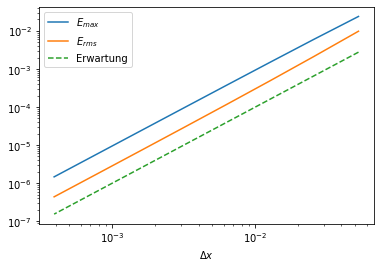

In [9]:
dx_array = L/(n_array-1)

plt.figure()
plt.loglog(dx_array,E_max, label=r'$E_{max}$')
plt.loglog(dx_array,E_rms, label=r'$E_{rms}$')
plt.loglog(dx_array,dx_array**2, '--', label='Erwartung')
plt.legend()
plt.xlabel(r'$\Delta x$')
plt.show()

Können Sie die Berechnung der Koeffizienten der finiten Differenzen automatisieren?

In [10]:
# Wir brauchen p Gleichungen (Zeilen) 
# und p Koeffizienten (Spalten)
p = 3; # Anzahl von Punkten
n = 1; # zu berechnende Ableitung
C = np.zeros((p,p))
rhs = np.zeros(p)

for i in range(p):      # Gleichungen: eine pro Ordnung der Taylor-Reihe
    for j in range(-p//2, p//2+1):  # Funktionswerte 
        C[i,j+p//2] = (1./np.math.factorial(i))*(j*dx)**i
rhs[n] = 1

autocoeff = np.linalg.solve(C,rhs)

print('Die analytisch  berechnete Koeffizienten sind :', coeff)
print('Die automatisch berechnete Koeffizienten sind :', autocoeff*dx*2)

Die analytisch  berechnete Koeffizienten sind : [-1  0  1]
Die automatisch berechnete Koeffizienten sind : [-1.00000000e+00  2.17608104e-16  1.00000000e+00]


Das Gleiche kann für ein nichtäquidistantes Gitter gemacht werden!

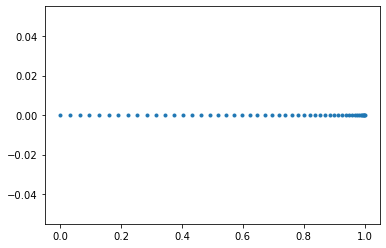

In [12]:
# zuest definieren ein nichtäquidistantes Gitter
# und plotten wir es
N = 50 # Anzahl von Punkten
x = np.sin(np.linspace(0,1,N)*np.pi/2)*L

plt.figure()
plt.plot(x,np.zeros(x.size),'.')
coeff = np.zeros((N,p))

In [21]:
# Wir brauchen p Gleichungen (Zeilen) 
# und p Koeffizienten (Spalten)
p = 3      # Anzahl von Punkten
n = 1      # zu berechnende Ableitung
C = np.zeros((p,p))
rhs = np.zeros(p)


for i in range(1,N-1):  # für jede Stelle i auf dem Gitter haben wir einen Satz von Koeffizienten
    for g in range(p):     # Gleichungen: eine pro Ordnung der Taylor-Reihe
          for j in range(-p//2,p//2+1):                 # Funktionswerte 
            C[g,j+p//2] = (1./np.math.factorial(g))*(x[i+j]-x[i])**g    
    rhs[n] = 1.0
    coeff[i,:] = np.linalg.solve(C,rhs)
    print('Coefficients at position '+str(np.round(x[i],2))+' are: ', coeff[i,:]*((x[i+p//2]-x[i-p//2])/(p-1))**n)



Coefficients at position 0.03 are:  [-0.49948622 -0.0010281   0.50051431]
Coefficients at position 0.06 are:  [-0.4989719  -0.00205831  0.50103021]
Coefficients at position 0.1 are:  [-0.498456   -0.00309278  0.50154878]
Coefficients at position 0.13 are:  [-0.49793744 -0.00413367  0.50207111]
Coefficients at position 0.16 are:  [-0.49741511 -0.00518322  0.50259832]
Coefficients at position 0.19 are:  [-0.49688789 -0.00624371  0.5031316 ]
Coefficients at position 0.22 are:  [-0.49635462 -0.00731754  0.50367216]
Coefficients at position 0.25 are:  [-0.49581406 -0.00840722  0.50422128]
Coefficients at position 0.28 are:  [-0.49526494 -0.0095154   0.50478034]
Coefficients at position 0.32 are:  [-0.49470588 -0.01064489  0.50535077]
Coefficients at position 0.35 are:  [-0.49413544 -0.01179872  0.50593416]
Coefficients at position 0.38 are:  [-0.49355206 -0.01298013  0.50653218]
Coefficients at position 0.4 are:  [-0.49295403 -0.01419264  0.50714668]
Coefficients at position 0.43 are:  [-0.